<center>
    
# [Компьютерное зрение](https://cogmodel.mipt.ru/wiki/index.php/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5)

## <center> Семинар 1 - Основы работы с OpenCV, фильтр Байера, сжатие/расжатие изображений

***

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMG_PATH = "data/Lenna_test_image.jpeg"

if not Path(IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_01/data .

# Считывание изображений

Считать изображение с диска можно с помощью функции imread:

In [3]:
img = cv2.imread(IMG_PATH)

In [4]:
img.shape

(512, 512, 3)

отобразим изображение:

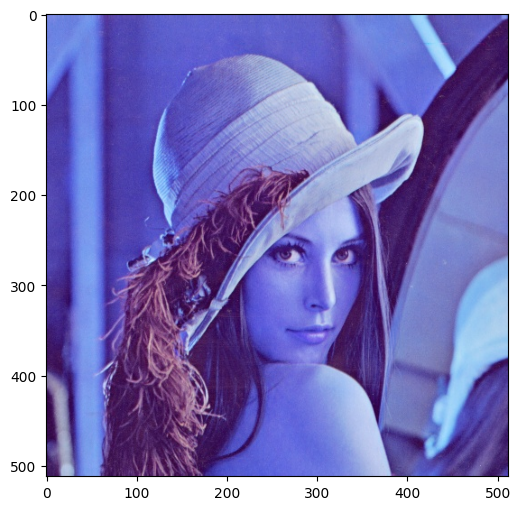

In [5]:
plt.figure(figsize=[6, 6])
plt.imshow(img)

Как видно, цвета изображения неправильные. Это потому, что функция imread считывает изображения в формате BGR (blue, green, red). Чтобы перейти к более привычному представлению RGB (reg, green, blue), который ожидает matplotlib, можно воспользоваться встроенной функцией cvtColor:

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

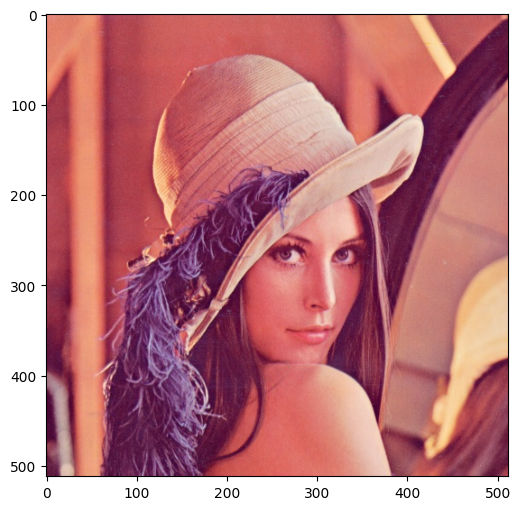

In [7]:
plt.figure(figsize=[6, 6])
plt.imshow(img_rgb)

# Работа с изображением

Загруженное цветное изображение является обычным numpy массивом с тремя размерностями, каждый элемент которого - целое беззнаковое 8-ми битное число, представляющее квантованную на 256 уровней интенсивность одного из цветов (RGB: 0 - красный, 1 - зеленый, 2 - синий):

In [8]:
print('type(img_rgb) = ', type(img_rgb))
print('img_rgb.shape = ', img_rgb.shape)
print('img_rgb.dtype = ', img_rgb.dtype)

type(img_rgb) =  <class 'numpy.ndarray'>
img_rgb.shape =  (512, 512, 3)
img_rgb.dtype =  uint8


Над изображением можно выполнять те же операции, что и над обычным массивом. Например, рассчитать статистики:

In [9]:
print('img_rgb.min() = ', img_rgb.min())
print('img_rgb.max() = ', img_rgb.max())
print('img_rgb.mean() = ', img_rgb.mean())
print('img_rgb.std() = ', img_rgb.std())
print('np.median(img_rgb) = ', np.median(img_rgb))

img_rgb.min() =  0
img_rgb.max() =  255
img_rgb.mean() =  128.22198232014975
img_rgb.std() =  58.942859735329606
np.median(img_rgb) =  119.0


присвоить какое-либо значение блоку(пикселю):

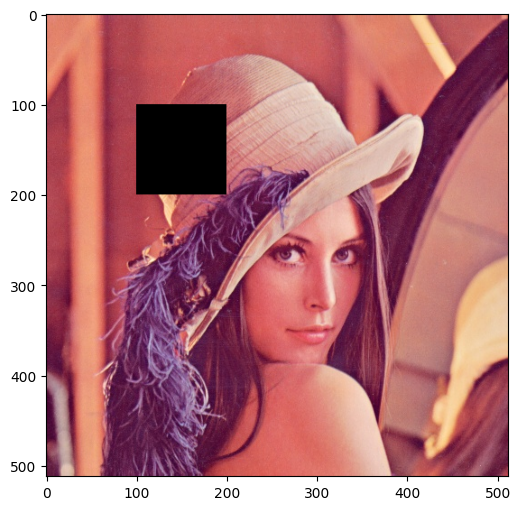

In [10]:
img_rgb_2 = img_rgb.copy()
img_rgb_2[100:200, 100:200] = 0

plt.figure(figsize=[6, 6])
plt.imshow(img_rgb_2)

прибавить какое-либо значение блоку(пикселю):

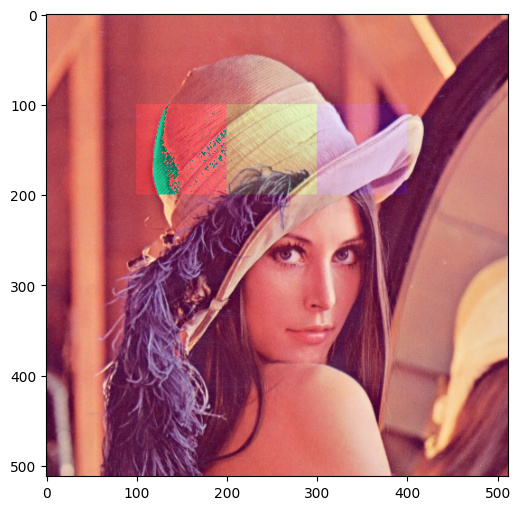

In [11]:
img_rgb_3 = img_rgb.copy()
img_rgb_3[100:200, 100:200, 0] += 40
img_rgb_3[100:200, 200:300, 1] += 40
img_rgb_3[100:200, 300:400, 2] += 40

plt.figure(figsize=[6, 6])
plt.imshow(img_rgb_3)

## * Вопрос 1

Что произошло с цветами на изображении img_rgb_3? Почему так произошло?

**Ответ:**

## * Упражнение 1: BGR -> RGB
Реализуйте функцию преобразования изображения в формате BGR в формат RGB

In [ ]:
def convert_color_bgr_to_rgb(img_bgr: np.ndarray) -> np.ndarray:
    pass  # your code

In [ ]:
assert((img_rgb == convert_color_bgr_to_rgb(img)).all())

## * Упражнение 2: Изменение яркости
Одним из простейших преобразований изображения является изменение уровня яркости, задаваемое следующим образом:
$$
f'(x, y) = \alpha f(x, y) + \beta
$$

В данном упражнении необходимо реализовать это преобразование, а также исследовать работу при различных значениях параметров. Какую физическую интерпретацию можно дать этому преобразованию?

In [ ]:
def change_intensity(img: np.ndarray, alpha: float = 1, beta: float = 0) -> np.ndarray:
    pass  # your code

In [ ]:
alpha = 1.2
beta = 10

img_out_cv = np.zeros_like(img_rgb)
cv2.convertScaleAbs(img_rgb, img_out_cv, alpha, beta)

img_out_my = change_intensity(img_rgb, alpha, beta)

assert((img_out_cv == img_out_my).all())

## * Упражнение 3: Смешивание изображений $\alpha - blend$

Другим простым преобразованием является смешивание двух изображений, задаваемое как:

$$
    f'(x, y) = \alpha f_1(x, y) + (1 - \alpha) f_2(x, y)
$$

Реализуйте данную операцию и продеменстрируйте ее работу на примере. Вы можете использовать изображение `data/opencv_logo.jpeg` или загрузить свое.

Приведите примеры, для каких задач может понадобиться данная операция. 

Как она может быть обобщена на большее количество изображений? Выпишите формулу.

In [ ]:
def blend_two_images(img_1: np.ndarray, img_2: np.ndarray, alpha: float = 0.5) -> np.ndarray:
    pass  # your code

# Нанесение текста и фигур

С помощью OpenCV можно добавить дополнительные элементы на изображение, такие как текст, простые геометрические фигуры и т.д. (см. https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

In [12]:
TEXT = 'Lenna 0.99'
UL_CORNER = (200, 200)  # верхний левый угол
FONT = 0                # шрифт
SCALE = 1               # размер
COLOR = (0, 255, 0)     # цвет - зеленый
THICKNESS = 2           # толшина линий

img_rgb_4 = img_rgb.copy()

cv2.putText(img_rgb_4, TEXT, UL_CORNER, FONT, SCALE, COLOR, THICKNESS)
cv2.rectangle(img_rgb_4, UL_CORNER, (370, 400), COLOR, THICKNESS)
None

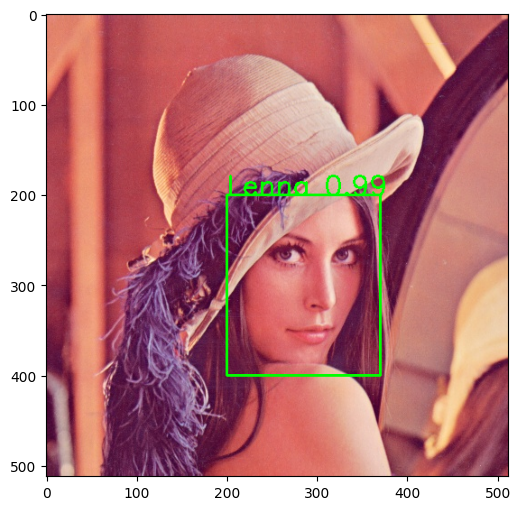

In [13]:
plt.figure(figsize=[6, 6])
plt.imshow(img_rgb_4)

## * Вопрос 2

Зачем может понадобиться рисовать на изображении?

**Ответ**:

# Фильтр Байера

Сырые изображения, приходящие с камеры, являются байеризованными. Они представлены в виде двумерного массива, где отдельные пиксели кодируют интенсивность синего, зеленого, красного цветов. 

![Фильтр Байера](data/bayer.jpeg)

OpenCV позволяет преобразовывать такие изображения в привычные трехканальные изображения. Этот процесс называется дебайеризация или демозаикинг.


## * Вопрос 3

Почему на фильтре Байера зеленых пикселей в 2 раза больше чем синих или красных? Можно ли сделать иначе?

**Ответ:**

## * Упражнение 4: Байеризация

Преобразуйте RGB изображение в байеризованное, как на картинке выше (в формате BGGR), разделив три канала на четыре смежных пикселя

In [ ]:
def rgb_to_bayer(img_rgb: np.ndarray) -> np.ndarray:
    pass  # your code

посмотрим на кусочек изображения вблизи:

In [ ]:
plt.figure(figsize=[6, 6])
plt.imshow(img_rgb[250:350, 250:350])

Получим его байеризованную версию:

In [ ]:
img_bayer = rgb_to_bayer(img_rgb)

Байеризованное изображение должно содержать характерный мазайчный узор:

In [ ]:
plt.figure(figsize=[6, 6])
plt.imshow(img_bayer[250:350, 250:350], cmap='Greys_r')

Для дебайеризации можно воспользоваться функцией из OpenCV:

In [ ]:
img_debayer = cv2.cvtColor(img_bayer, cv2.COLOR_BayerBGGR2RGB)

Если все сделано верно, то дебайеризованное изображение будет похоже на исходное. Однако точного совпадения не будет. Попытайтесь предположить, почему?

In [ ]:
plt.figure(figsize=[6, 6])
plt.imshow(img_debayer[250:350, 250:350])

# Сжатие/расжатие изображений

Изображения в формате JPEG являются сжатыми изображениями и на диске могут занимать существенно меньше места, чем после загрузки в оперативную память. Чтобы загрузить изображения в сжатом формате, можно просто прочитать файл в бинарном режиме:

In [14]:
with open(IMG_PATH, 'rb') as f:
    img_bytes = f.read()

In [15]:
print('type(img_bytes) = ', type(img_bytes))

type(img_bytes) =  <class 'bytes'>


Считанные данные нужно преобразовать в массив байт для возможности дальнейшего расжатия:

In [16]:
img_buf = np.asarray(bytearray(img_bytes), dtype=np.uint8)

In [17]:
img_buf.shape, img_buf.dtype

((107478,), dtype('uint8'))

In [18]:
img_buf_size = np.array(img_buf.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_size / 1024 / 1024))

Размер сжатого изображения: 0.102 МБ


Как видим, в сжатом виде изображение занимает мало места и в оперативной памяти. Разожмем его с помощью средств OpenCV:

In [19]:
img = cv2.imdecode(img_buf, cv2.IMREAD_COLOR)

In [20]:
img.shape, img.dtype

((512, 512, 3), dtype('uint8'))

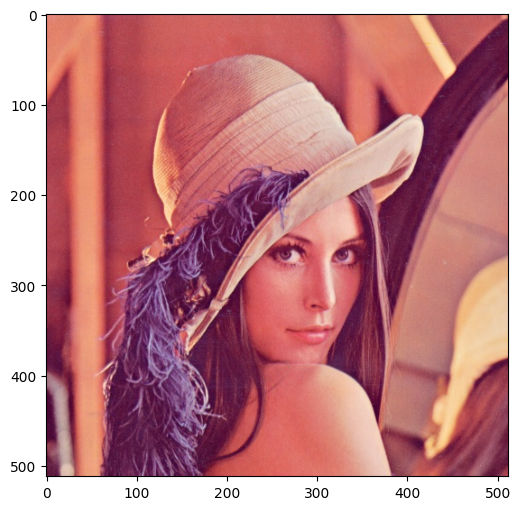

In [21]:
plt.figure(figsize=[6, 6])
plt.imshow(img[:, :, ::-1])

In [22]:
img_size = np.array(img.shape).prod()
print('Размер изображения: {:.3f} МБ'.format(img_size / 1024 / 1024))

Размер изображения: 0.750 МБ


Как видим в несжатом представлении изображение занимает существенно больше памяти. Рассчитаем коэффициент сжатия:

In [23]:
print('Коэффициент сжатия: {:.1f}'.format(img_size / img_buf_size))

Коэффициент сжатия: 7.3


Изображение можно сжать обратно следующим образом:

In [24]:
ok, img_buf_2 = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 10))

In [25]:
img_buf_2_size = np.array(img_buf_2.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_2_size / 1024 / 1024))

Размер сжатого изображения: 0.009 МБ


Алгоритм сжатия определяется указанным расширением, кроме того имеет различные параметры: https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/enum_cv_ImwriteFlags.html. Наиболее используемым является качество сжатия.

Декодируем сжатое с качеством 10 изображение:

In [26]:
img_2 = cv2.imdecode(img_buf_2, cv2.IMREAD_COLOR)

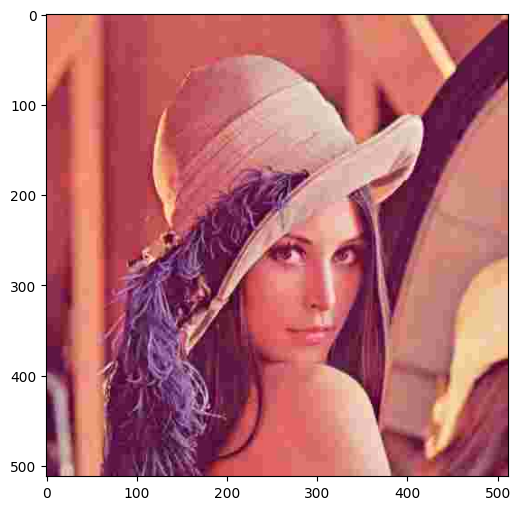

In [27]:
plt.figure(figsize=[6, 6])
plt.imshow(img_2[:, :, ::-1])

## * Вопрос 4

Зачем может понадобиться хранить в оперативной памяти сжатые изображения?